In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
pip install --upgrade catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
file_path = "/kaggle/input/fullset3/FullDataset3.xlsx"
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['Remplissage', 'Sheet1']


In [4]:
df = pd.read_excel(file_path,sheet_name='Remplissage')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ID client,EMC_N,Evolution_EM_NvsN0,ZeroStreak_N0,ZeroStreak_N,Delta_EM_N0,Delta_EM_N,MoisActifs_N0,MoisActifs_N,Volatilite_EM_N0,...,EMC_credit_N,Âge client,catégorie_âge,Type Personne,canal_unique,Mouvements_Cumulés_Créditeurs_à_M_(Dh)_N,Mouvements_Cumulés_Débiteurs_à_M_(Dh)_N,Solde_à_M_(Dh)_N,Solde_négatif_N,Nb_Années_Solde_Négatif
0,1,6.123909e+03,17.991178,0,0,1.191534e+03,-4.065876e+03,12,12,3535.314801,...,0.000000,NaN,Non Identifié,Non Identifié,False,52003.00,59532.13,2532.32,False,0
1,2,2.206286e+03,-80.339450,0,0,5.729041e+03,-6.974068e+03,12,12,13457.091284,...,0.000000,47.0,45-60,PHYSIQUE,True,18753.00,26026.77,671.65,False,0
2,3,1.315489e+05,-0.288237,0,0,-3.489388e+02,-3.552164e+02,12,12,114.476288,...,-1685.083327,NaN,Non Identifié,Non Identifié,False,0.00,371.07,129675.00,False,0
3,4,2.108484e+06,7.831186,0,0,1.290317e+06,-2.175998e+06,12,12,453797.362144,...,0.000000,40.0,30-45,PHYSIQUE,False,6481987.75,8459450.37,942287.71,False,0
4,5,5.328427e+04,-49.629914,0,0,-3.203970e+02,-1.051005e+05,12,12,130.795422,...,0.000000,48.0,45-60,PHYSIQUE,True,170016.56,275094.54,434.91,False,0


In [5]:
pip install --upgrade imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 88.0 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.model_selection import train_test_split 
id_clients = df["ID client"]
X = df.drop(columns=['ID client','Attrition_2023'])
y = df['Attrition_2023']

In [7]:
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, id_clients, test_size=0.2, random_state=42, stratify=y)
print(X_train.dtypes)

EMC_N                                       float64
Evolution_EM_NvsN0                          float64
ZeroStreak_N0                                 int64
ZeroStreak_N                                  int64
Delta_EM_N0                                 float64
Delta_EM_N                                  float64
MoisActifs_N0                                 int64
MoisActifs_N                                  int64
Volatilite_EM_N0                            float64
Volatilite_EM_N                             float64
Ligne Métier_x                               object
Niveau_Service_Regroupe                      object
Statut                                       object
PNB_total_N                                 float64
Nb_produits_differents_N                      int64
Nb_ssfamilles_N                               int64
EMC_credit_N                                float64
Âge client                                  float64
catégorie_âge                                object
Type Personn

In [8]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import pandas as pd
 
 
# 2. Identifier les colonnes catégorielles (non encodées)
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
  

cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=100
)
 
cat_model.fit(X_train, y_train, cat_features=cat_features,
              eval_set=(X_test, y_test), early_stopping_rounds=100)
 
# 5. Prédictions
y_pred = cat_model.predict(X_test)
y_proba = cat_model.predict_proba(X_test)[:, 1]
 
# 6. Évaluation
print("=== Résultats CatBoost ===")
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred))

0:	test: 0.8807381	best: 0.8807381 (0)	total: 86.9ms	remaining: 1m 26s
100:	test: 0.9236069	best: 0.9236069 (100)	total: 2.36s	remaining: 21s
200:	test: 0.9258491	best: 0.9258491 (200)	total: 4.55s	remaining: 18.1s
300:	test: 0.9270645	best: 0.9270775 (299)	total: 6.81s	remaining: 15.8s
400:	test: 0.9277365	best: 0.9277606 (391)	total: 9.12s	remaining: 13.6s
500:	test: 0.9282681	best: 0.9283157 (483)	total: 11.4s	remaining: 11.4s
600:	test: 0.9286571	best: 0.9287504 (584)	total: 13.8s	remaining: 9.16s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9287503974
bestIteration = 584

Shrink model to first 585 iterations.
=== Résultats CatBoost ===
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3616
           1       0.79      0.69      0.73      1364

    accuracy                           0.86      4980
   macro avg       0.84      0.81      0.82      4980
weighted avg       0.86      0.86      0.86      4980



In [9]:
# Choisir un seuil manuellement (par exemple, 0.6)
threshold = 0.45
y_pred_thresh = (y_proba >= threshold).astype(int)
 
# Afficher les résultats
print("=== Évaluation avec seuil =", threshold, "===")
print(classification_report(y_test, y_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test, y_pred_thresh))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_thresh))

=== Évaluation avec seuil = 0.45 ===
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3616
           1       0.76      0.72      0.74      1364

    accuracy                           0.86      4980
   macro avg       0.83      0.82      0.82      4980
weighted avg       0.86      0.86      0.86      4980

ROC AUC: 0.8197198667376016
Matrice de confusion :
 [[3309  307]
 [ 376  988]]


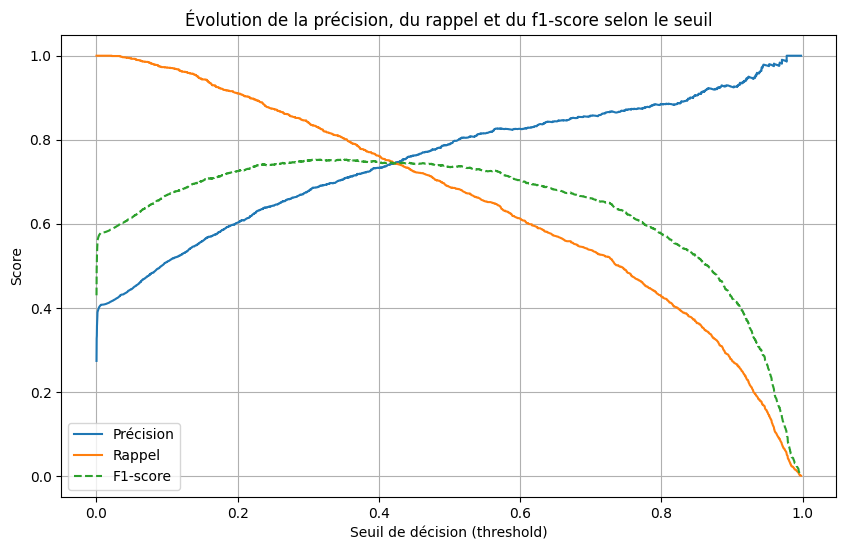

In [10]:
from sklearn.metrics import precision_recall_curve
 
# Valeurs réelles
y_true = y_test
 
# Courbes précision, rappel, f1
precisions, recalls, thresholds = precision_recall_curve(y_true, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
 
# Tracé
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Précision')
plt.plot(thresholds, recalls[:-1], label='Rappel')
plt.plot(thresholds, f1_scores[:-1], label='F1-score', linestyle='--')
plt.xlabel('Seuil de décision (threshold)')
plt.ylabel('Score')
plt.title('Évolution de la précision, du rappel et du f1-score selon le seuil')
plt.legend()
plt.grid()
plt.show()

In [11]:
print("Train accuracy:", cat_model.score(X_train, y_train))
print("Test accuracy:", cat_model.score(X_test, y_test))

Train accuracy: 0.9071285140562249
Test accuracy: 0.8640562248995984


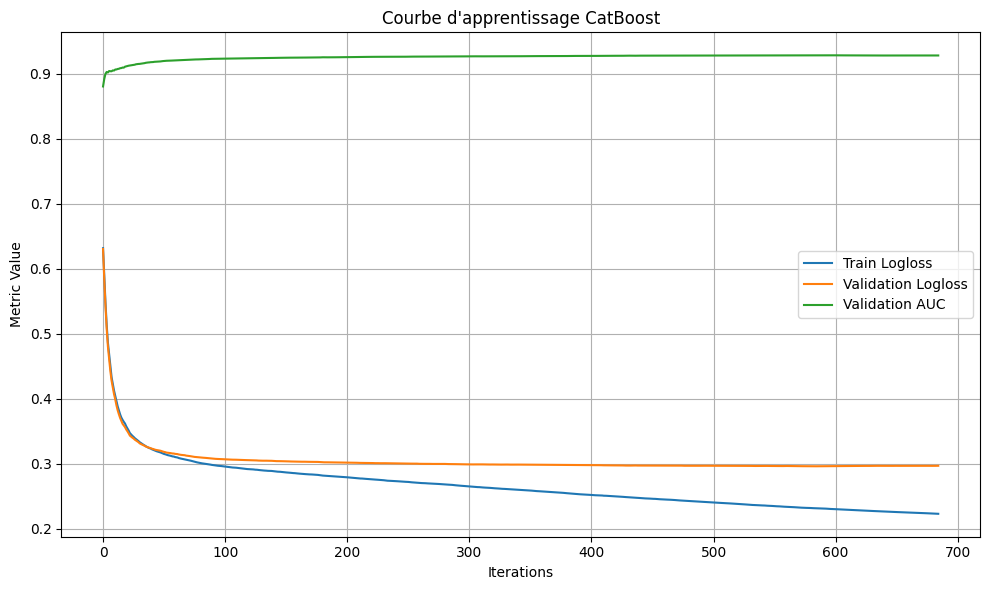

In [12]:
# Enregistrement des résultats d'évaluation
evals_result = cat_model.get_evals_result()
 
# Affichage de la courbe d'apprentissage (AUC ici)
plt.figure(figsize=(10, 6))
plt.plot(evals_result['learn']['Logloss'], label='Train Logloss')
plt.plot(evals_result['validation']['Logloss'], label='Validation Logloss')
plt.plot(evals_result['validation']['AUC'], label='Validation AUC')
plt.xlabel("Iterations")
plt.ylabel("Metric Value")
plt.title("Courbe d'apprentissage CatBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>Sauvegarder Modèle</h2>

In [13]:
import joblib
joblib.dump(cat_model, 'catboost_model_score2.pkl')
#joblib.dump(threshold, 'threshold.pkl')

['catboost_model_score2.pkl']

<h2>Test</h2>

In [14]:
model = joblib.load("catboost_model_score2.pkl")

In [15]:
df_new=df.copy()
df_new = df_new.drop(columns=['Attrition_2023'])

In [16]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24900 entries, 0 to 24899
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID client                                 24900 non-null  int64  
 1   EMC_N                                     24900 non-null  float64
 2   Evolution_EM_NvsN0                        24900 non-null  float64
 3   ZeroStreak_N0                             24900 non-null  int64  
 4   ZeroStreak_N                              24900 non-null  int64  
 5   Delta_EM_N0                               24900 non-null  float64
 6   Delta_EM_N                                24900 non-null  float64
 7   MoisActifs_N0                             24900 non-null  int64  
 8   MoisActifs_N                              24900 non-null  int64  
 9   Volatilite_EM_N0                          24900 non-null  float64
 10  Volatilite_EM_N                   

In [17]:
# Supposons que 'ID client' est le nom de la colonne
df_features = df_new.drop(columns=['ID client'])
 
# Forcer les colonnes catégorielles en string
for col in cat_features:
    if col in df_features.columns:
        df_features[col] = df_features[col].astype(str)
 
# Pool CatBoost
data_pool = Pool(df_features, cat_features=cat_features)
 
# Prédictions
y_proba = model.predict_proba(data_pool)[:, 1]
df_new['Attrition_Prob'] = y_proba
df_new['Attrition_Pred'] = (y_proba >= threshold).astype(int)

In [18]:
df_new.head()

,ID client,EMC_N,Evolution_EM_NvsN0,ZeroStreak_N0,ZeroStreak_N,Delta_EM_N0,Delta_EM_N,MoisActifs_N0,MoisActifs_N,Volatilite_EM_N0,...,catégorie_âge,Type Personne,canal_unique,Mouvements_Cumulés_Créditeurs_à_M_(Dh)_N,Mouvements_Cumulés_Débiteurs_à_M_(Dh)_N,Solde_à_M_(Dh)_N,Solde_négatif_N,Nb_Années_Solde_Négatif,Attrition_Prob,Attrition_Pred
0,1,6.123909e+03,17.991178,0,0,1.191534e+03,-4.065876e+03,12,12,3535.314801,...,Non Identifié,Non Identifié,False,52003.00,59532.13,2532.32,False,0,0.158497,0
1,2,2.206286e+03,-80.339450,0,0,5.729041e+03,-6.974068e+03,12,12,13457.091284,...,45-60,PHYSIQUE,True,18753.00,26026.77,671.65,False,0,0.551935,1
2,3,1.315489e+05,-0.288237,0,0,-3.489388e+02,-3.552164e+02,12,12,114.476288,...,Non Identifié,Non Identifié,False,0.00,371.07,129675.00,False,0,0.932320,1
3,4,2.108484e+06,7.831186,0,0,1.290317e+06,-2.175998e+06,12,12,453797.362144,...,30-45,PHYSIQUE,False,6481987.75,8459450.37,942287.71,False,0,0.185490,0
4,5,5.328427e+04,-49.629914,0,0,-3.203970e+02,-1.051005e+05,12,12,130.795422,...,45-60,PHYSIQUE,True,170016.56,275094.54,434.91,False,0,0.690140,1
